# Introduction

Here I show concordance between demuxlet and freemuxlet for both ATAC and RNA.

# Setup

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle as pkl
import itertools as it
from functools import reduce
import scanpy as sc

import sys

from clue_helper import utils as clue_utils
from clue_helper import detools
from clue_helper import sctools

In [2]:
sc.settings.set_figure_params(dpi=80)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.facecolor'] = (1, 1, 1, 0)

In [3]:
mountpoint = '/data/clue_test/'
prefix_adts = mountpoint + 'amo/adts/'
prefix_mrna = mountpoint + 'amo/mrna/'
prefix_atac = mountpoint + 'amo/atac/'
prefix_figs = mountpoint + 'figs/'

## Load in Data

In [4]:
with open(mountpoint + 'meta.pkl', 'rb') as file:
    meta = pkl.load(file)
ct_colors = meta['ct_colors']['ct2']['hex']
cond_colors = meta['cond_colors']['hex']
conds_focus = meta['conds']['conds_focus']

# Load in Data

In [5]:
data = dict()

In [6]:
cols = ['NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS']

In [8]:
for i in range(1,6):
    demux = pd.read_csv(prefix_mrna + 'demultiplex/demux/outs/well%d_demux.best' % i, sep='\t').set_index('BARCODE')[cols]
    freemux = pd.read_csv(prefix_mrna + 'demultiplex/freemux/wellsplit/well%d.samples' % i, sep='\t').set_index('BARCODE')[cols]
    freemux.index = freemux.index.str.replace(r'-[0-9]$', r'-1')
    data[i] = demux.join(freemux, lsuffix='-D', rsuffix='-F')

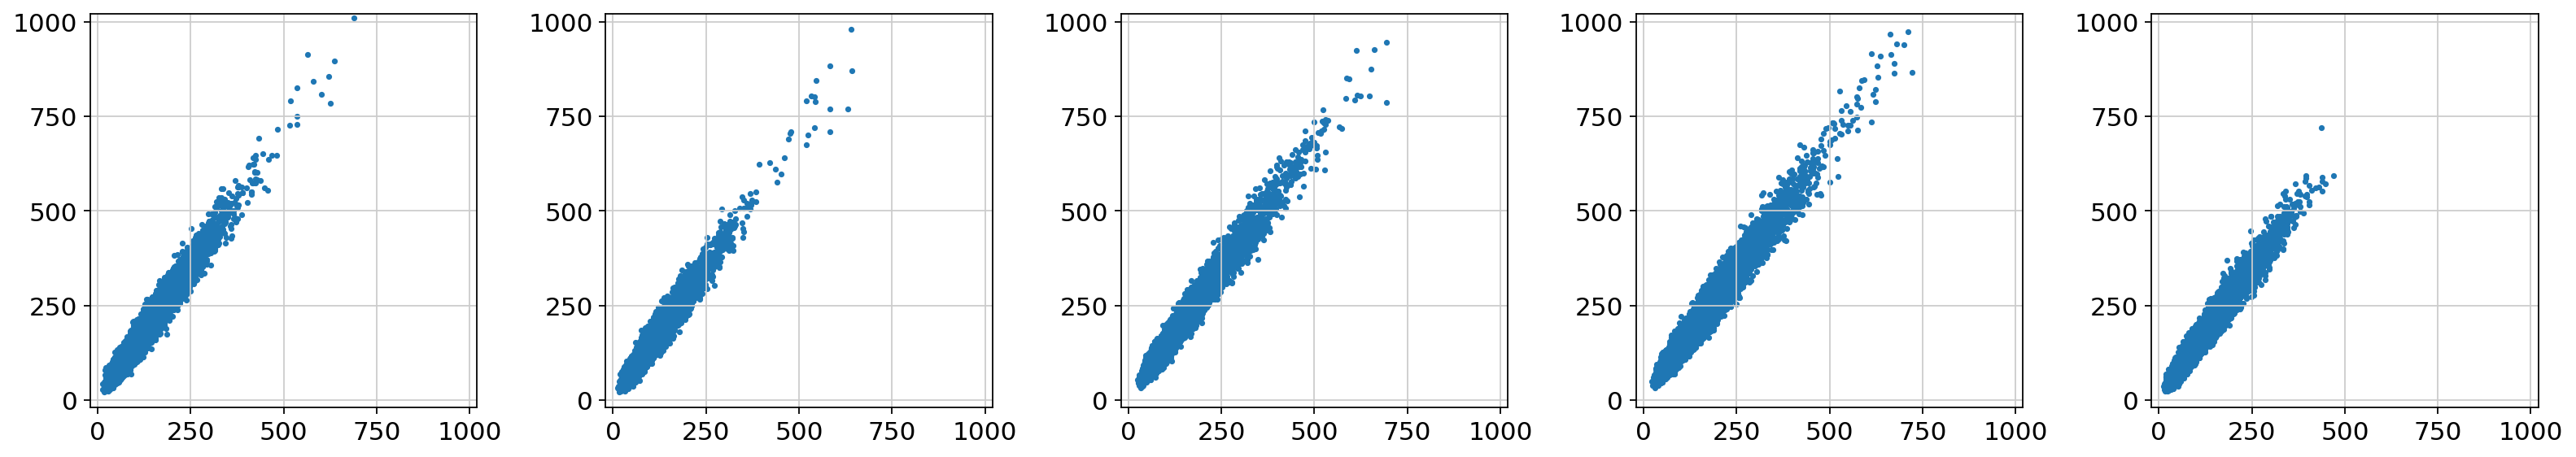

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(20,3.75))
for well, ax in zip(data.keys(), ax):
    ax.scatter(data[well]['NUM.SNPS-D'].values, data[well]['NUM.SNPS-F'].values, s=5)
    clue_utils.id_axes(ax, lim=(-20, 1020), tix=np.array([0, 250, 500, 750, 1000]))
plt.tight_layout()

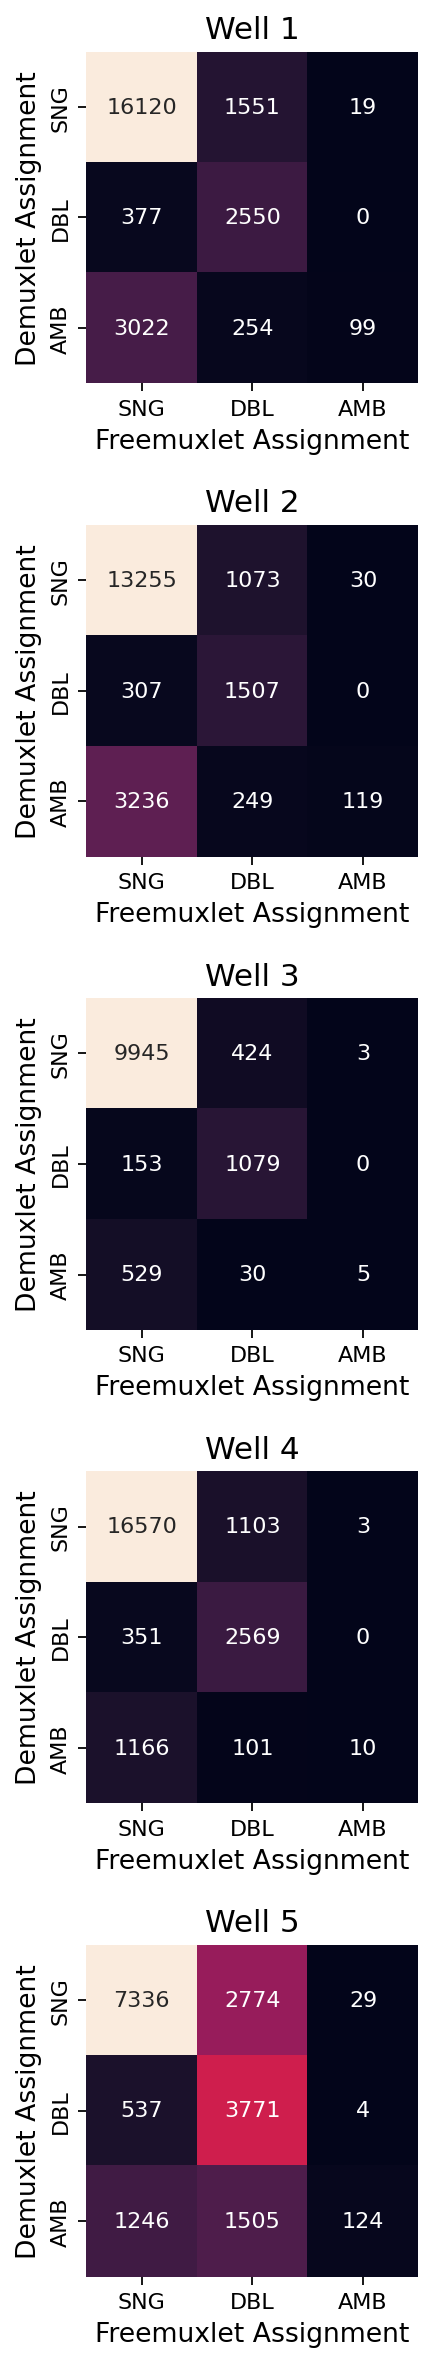

In [11]:
order = ['SNG', 'DBL', 'AMB']
fig, ax = plt.subplots(5, 1, figsize=(3,15))
for well, ax in zip(data.keys(), ax):
    ax = sns.heatmap(data[well].groupby(['DROPLET.TYPE-D', 'DROPLET.TYPE-F']).size().unstack('DROPLET.TYPE-F').fillna(0).loc[order, order], annot=True, fmt='0.0f', ax=ax, square=True, cbar=None, annot_kws={'size': 10})
    ax.set_xticklabels(order, size=10)
    ax.set_yticklabels(order, size=10)
    ax.set_xlabel('Freemuxlet Assignment', size=12)
    ax.set_ylabel('Demuxlet Assignment', size=12)
    ax.set_title('Well %d' % well)
plt.tight_layout()
# plt.savefig(prefix_figs + 'figS2/droptype_concordance.pdf', dpi=300, bbox_inches=0, pad_inches=0.1)

In [13]:
matchup_mrna = pd.read_csv(prefix_mrna + 'demultiplex/matchup/matchup.txt', sep='\t', index_col=0, )
matchup_atac = pd.read_csv(prefix_atac + 'demultiplex/matchup/matchup.txt', sep='\t', index_col=0, )

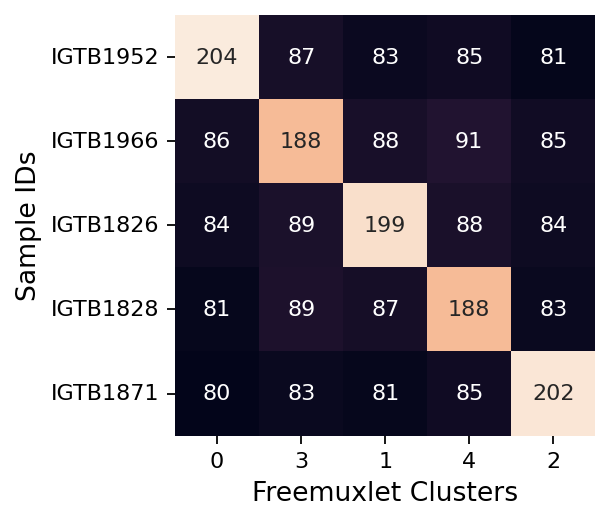

In [14]:
order_num = [0, 3, 1, 4, 2]
order = ['CLUST' + str(i) for i in order_num]
ax = sns.heatmap(matchup_mrna[order], square=True, annot=True, fmt='0.0f', annot_kws={'size': 10}, 
                 cbar=False
                )
                 
ax.set_xlabel('Freemuxlet Clusters', size=12)
ax.set_xticklabels(order_num, rotation=0, size=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=10)
ax.set_ylabel('Sample IDs', size=12);
plt.tight_layout()
# plt.savefig(prefix_figs + 'figS2/mrna_genotype_similarity.pdf', dpi=300, bbox_inches=0, pad_inches=0.1)

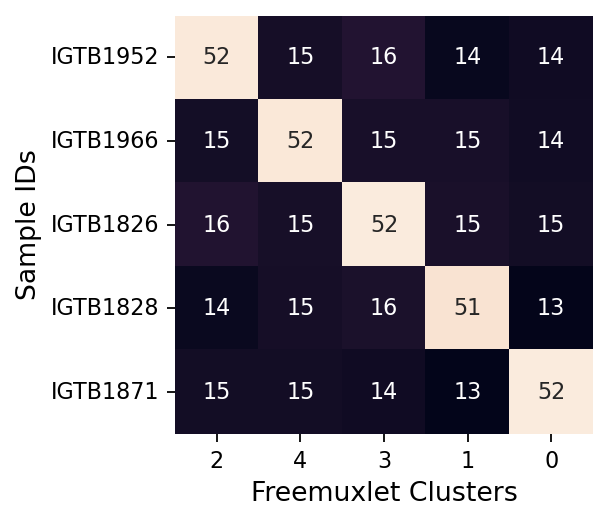

In [73]:
order_num = [2, 4, 3, 1, 0]
order = ['CLUST' + str(i) for i in order_num]
ax = sns.heatmap(matchup_atac[order], square=True, annot=True, fmt='0.0f', annot_kws={'size': 10}, 
                 cbar=False
                )
                 
ax.set_xlabel('Freemuxlet Clusters', size=12)
ax.set_xticklabels(order_num, rotation=0, size=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=10)
ax.set_ylabel('Sample IDs', size=12);
plt.tight_layout()
# plt.savefig(prefix_figs + 'figS2/atac_genotype_similarity.pdf', dpi=300, bbox_inches=0, pad_inches=0.1)

In [156]:
data[1][data[1]['BEST.GUESS-D'].str.contains('IGTB1871')]['DROPLET.TYPE-D'].value_counts()

AMB    345
DBL    211
SNG     46
Name: DROPLET.TYPE-D, dtype: int64

In [157]:
data[2][data[2]['BEST.GUESS-D'].str.contains('IGTB1828')]['DROPLET.TYPE-D'].value_counts()

AMB    192
DBL    102
SNG     21
Name: DROPLET.TYPE-D, dtype: int64